In [ ]:
from statsmodels.regression import linear_model as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm2

In [ ]:
import os
import pingouin

In [185]:
csvfile = sorted(os.listdir())[1]
df = pd.read_csv(csvfile, sep =  '\t', index_col = 0)
fd.head()

,tract,tags,number of tracts,mean length(mm),span(mm),curl,elongation,diameter(mm),volume(mm^3),trunk volume(mm^3),branch volume(mm^3),total surface area(mm^2),total radius of end regions(mm),total area of end regions(mm^2),irregularity,area of end region 1(mm^2),radius of end region 1(mm),irregularity of end region 1,area of end region 2(mm^2),radius of end region 2(mm),irregularity of end region 2,qa,nqa,dti_fa,md,ad,rd,gfa,iso,rdi,nrdi02L,nrdi04L,nrdi06L,Family_ID,Release,Acquisition,Gender,Gender.1,Age,Age_in_Yrs,...,NEORAW_31,NEORAW_32,NEORAW_33,NEORAW_34,NEORAW_35,NEORAW_36,NEORAW_37,NEORAW_38,NEORAW_39,NEORAW_40,NEORAW_41,NEORAW_42,NEORAW_43,NEORAW_44,NEORAW_45,NEORAW_46,NEORAW_47,NEORAW_48,NEORAW_49,NEORAW_50,NEORAW_51,NEORAW_52,NEORAW_53,NEORAW_54,NEORAW_55,NEORAW_56,NEORAW_57,NEORAW_58,NEORAW_59,NEORAW_60,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
100307,Cingulum_Parahippocampal_R,dsi-studio-atk,2337.0,43.7799,20.4513,2.14069,3.83889,11.40430,4472.0,4109.0,363.0,9244.0,11.9302,1534.0,5.89341,779.0,6.33728,0.161964,755.0,5.59291,0.130160,0.158864,0.174994,0.269702,0.644917,0.833841,0.550457,0.099691,0.335815,0.298586,0.205559,0.031494,0.0,51488_81352,Q1,Q01,F,1,26-30,27,...,A,A,D,A,A,SD,A,N,D,A,D,D,N,D,D,A,A,D,A,A,D,SA,A,SD,D,D,D,D,SD,A,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
100408,Cingulum_Parahippocampal_R,dsi-studio-atk,2048.0,41.5856,19.1108,2.17602,3.62726,11.46470,4293.0,3958.0,335.0,9403.0,13.6456,1284.0,6.27783,725.0,6.60314,0.188935,559.0,7.04248,0.278734,0.106728,0.130743,0.220135,0.586714,0.722629,0.518758,0.077641,0.300476,0.263596,0.176899,0.025041,0.0,51730_81594,Q3,Q03,M,2,31-35,33,...,A,D,D,A,A,SD,A,SD,D,A,D,N,D,N,D,N,A,D,SA,A,D,A,A,N,D,N,D,A,A,A,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
101107,Cingulum_Parahippocampal_R,dsi-studio-atk,2270.0,46.6641,21.6664,2.15375,4.19130,11.13360,4543.0,3761.0,782.0,10681.0,12.2051,1276.0,6.54401,797.0,7.03697,0.195192,479.0,5.16817,0.175181,0.151999,0.170913,0.234074,0.613259,0.764008,0.537886,0.083518,0.392506,0.344580,0.234404,0.034626,0.0,51969_81833,S500,Q06,M,2,22-25,22,...,A,N,D,A,SA,SA,N,N,N,SA,SD,N,D,A,SD,N,A,SD,SA,A,SD,SA,SA,A,D,N,SD,A,D,A,6.8,108.79,97.19,1.0,50.1,134.65,131.38,1.84,0.0,1.84
102311,Cingulum_Parahippocampal_R,dsi-studio-atk,2107.0,48.5477,23.2403,2.08895,4.86750,9.97384,3793.0,3580.0,213.0,7910.0,11.9670,1384.0,5.19991,825.0,6.44167,0.158013,559.0,5.52537,0.171578,0.158681,0.162494,0.277497,0.581316,0.756130,0.493914,0.095551,0.354995,0.315542,0.212849,0.030610,0.0,51679_81543,S500,Q06,F,1,26-30,26,...,D,A,D,A,SA,D,D,SD,D,SA,SD,A,A,D,SD,D,A,D,A,SA,SD,A,A,N,D,D,D,N,A,SA,4.4,122.25,110.45,1.0,52.2,98.31,99.06,1.80,0.0,1.80
102513,Cingulum_Parahippocampal_R,dsi-studio-atk,2200.0,44.1844,20.5590,2.14915,4.07241,10.84970,4085.0,3727.0,358.0,9206.0,13.1741,1358.0,6.11274,676.0,6.70717,0.209065,682.0,6.46696,0.192649,0.108588,0.143061,0.250944,0.598906,0.763821,0.516445,0.090047,0.258702,0.228528,0.154511,0.022394,0.0,56077_85897,S900,Q10,M,2,26-30,30,...,N,D,N,A,N,D,N,SD,N,A,D,N,A,N,A,D,N,SD,A,N,SD,A,SA,N,D,SD,A,SA,A,SA,5.2,108.79,98.04,2.0,54.3,84.07,82.37,1.92,0.0,1.92


In [186]:
diff_labels = df.columns[df.columns.tolist().index("qa"):df.columns.tolist().index("rdi") + 1].tolist()
pers_labels = df.columns[df.columns.tolist().index("NEOFAC_A"):df.columns.tolist().index("NEOFAC_E") + 1].tolist()
diff_labels, pers_labels


# same as doing

#diff_labels = ["qa", "nqa", "dti_fa", "md", "ad", "rd", "gfa", "iso","rdi"]
#pers_labels = ["NEOFAC_A","NEOFAC_O", "NEOFAC_C", "NEOFAC_N", "NEOFAC_E"]

(['qa', 'nqa', 'dti_fa', 'md', 'ad', 'rd', 'gfa', 'iso', 'rdi'],
 ['NEOFAC_A', 'NEOFAC_O', 'NEOFAC_C', 'NEOFAC_N', 'NEOFAC_E'])

In [ ]:
!pip install pingouin

In [187]:
pval = []
features = []
coef = []
intercept = []
xs = []
for file in sorted(os.listdir()):
  if "tsv" in file:
    print(file)
    for s in pers_labels:
      for l in diff_labels:
        fd = pd.read_csv(file, sep =  '\t', index_col = 0)
        x = np.delete(np.array(fd[s]),339)
        y = np.delete(np.array(fd[l]),339)
        idx = np.where(np.isnan(x) == 1)
        idx2 = np.where(np.isnan(y) == 1) 
        x = np.delete(np.array(x),idx)
        x = np.delete(np.array(x),idx2)
        y = np.delete(np.array(y),idx2)
        y = np.delete(np.array(y),idx)
        x2 = sm2.add_constant(x)
        ls = sm.OLS(y, x2).fit()
        pval.append(ls.pvalues[1])
        coef.append(ls.params[1])
        intercept.append(ls.params[0])
        xs.append(x)
        features.append([file,s,l])

Arcuate_Fasciculus_L.tsv
Arcuate_Fasciculus_R.tsv
Cingulum_Frontal_Parahippocampal_L.tsv
Cingulum_Frontal_Parahippocampal_R.tsv
Cingulum_Frontal_Parietal_L.tsv
Cingulum_Frontal_Parietal_R.tsv
Cingulum_Parahippocampal_L.tsv
Cingulum_Parahippocampal_Parietal_L.tsv
Cingulum_Parahippocampal_Parietal_R.tsv
Cingulum_Parahippocampal_R.tsv
Cingulum_Rarolfactory_L.tsv
Cingulum_Rarolfactory_R.tsv
Corpus_Callosum_Body.tsv
Corpus_Callosum_Forceps_Major.tsv
Corpus_Callosum_Forceps_Minor.tsv
Corpus_Callosum_Tapetum.tsv
Corticobulbar_Tract_L.tsv
Corticobulbar_Tract_R.tsv
Corticopontine_Tract_Frontal_L.tsv
Corticopontine_Tract_Frontal_R.tsv
Corticopontine_Tract_Occipital_L.tsv
Corticopontine_Tract_Occipital_R.tsv
Corticopontine_Tract_Parietal_L.tsv
Corticopontine_Tract_Parietal_R.tsv
Corticospinal_Tract_L.tsv
Corticospinal_Tract_R.tsv
Corticostriatal_Tract_Anterior_L.tsv
Corticostriatal_Tract_Anterior_R.tsv
Corticostriatal_Tract_Posterior_L.tsv
Corticostriatal_Tract_Posterior_R.tsv
Corticostriatal_Tra

In [189]:
files = np.array(features)[np.array(pval) < 0.0005]
pval.index(min(pval))

409

In [160]:
pval[409]

0.00043917757328590064

In [190]:
features[409]

['Cingulum_Parahippocampal_R.tsv', 'NEOFAC_A', 'ad']

In [191]:
files

array([['Cingulum_Parahippocampal_R.tsv', 'NEOFAC_A', 'ad'],
       ['Inferior_Cerebellar_Peduncle_L.tsv', 'NEOFAC_N', 'nqa']],
      dtype='<U42')

In [ ]:
files

array([['Cingulum_Parahippocampal_R.tsv', 'ad', 'NEOFAC_A'],
       ['Inferior_Cerebellar_Peduncle_L.tsv', 'nqa', 'NEOFAC_N']],
      dtype='<U42')

Slope coeff and pvalue:  0.1680255096498464 0.00043917757328588514


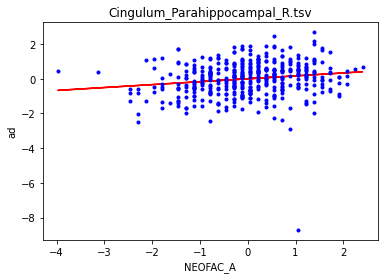

Slope coeff and pvalue:  0.1672802212988919 0.000466075991889743


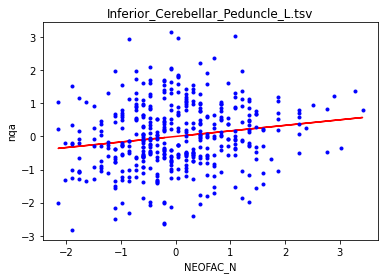

In [188]:
for r in range(len(files)):
  f = files[r][0]
  s = files[r][1]
  l = files[r][2]
  fd = pd.read_csv(f, sep =  '\t', index_col = 0)
  x = np.delete(np.array(fd[s]),339)
  y = np.delete(np.array(fd[l]),339)
  idx = np.where(np.isnan(x) == 1)
  idx2 = np.where(np.isnan(y) == 1) 
  y = np.delete(np.array(y),idx2)
  y = np.delete(np.array(y),idx)
  x = np.delete(np.array(x),idx)
  x = np.delete(np.array(x),idx2)
  #x = np.delete(np.array(x),13) # outlier
  #y = np.delete(np.array(y),13) #outlier
  x = (x- np.mean(x))/np.std(x) # z-score
  y = (y- np.mean(y))/np.std(y) # z-score
  x2 = sm2.add_constant(x)
  ls = sm.OLS(y, x2).fit()
  plt.figure()
  plt.plot(x, ls.params[0] + ls.params[1]*x, 'r-')
  print('Slope coeff and pvalue: ',ls.params[1], ls.pvalues[1])
  ls.summary()
  plt.title(f)
  plt.plot(x,y, 'b.')
  plt.xlabel(s)
  plt.ylabel(l)
  plt.show()

## Taking into account some covariates

In [164]:
import pingouin
s = files[0][1]
l = files[0][2]
fd = pd.read_csv(files[0][0], sep =  '\t', index_col = 0)

In [165]:
s

'NEOFAC_A'

In [ ]:
fd["Gender.1"]

100307    1
100408    2
101107    2
102311    1
102513    2
         ..
971160    2
973770    2
987983    1
990366    2
995174    2
Name: Gender.1, Length: 435, dtype: int64

In [166]:
pingouin.partial_corr(fd,s,l)


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,434,0.168026,"[0.08, 0.26]",0.028233,0.023723,0.000439,28.398,0.941261


In [167]:
pingouin.partial_corr(fd,s,l, "Gender.1")


,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,434,0.077907,"[-0.02, 0.17]",0.006069,0.001457,0.105063,0.223,0.367949


In [168]:
rs = pingouin.partial_corr(fd,s,l, ["Gender.1", "Age_in_Yrs"])

In [169]:
rs["p-val"]
rs

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,434,0.097825,"[0.0, 0.19]",0.00957,0.004974,0.041653,0.475,0.53171
